<a href="https://colab.research.google.com/github/tharshan24/google_colabs_ml/blob/main/SCS3201_IS3117_CS3120_Multivariate_Regression_18001262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCS3201 / IS3117 / CS3120 Machine Learning and Neural Computing

**Assignment I**

**18001262**

Multivate Regression

################################

### Import Libraries

In [570]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

#### Download dataset to colab

In [571]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Colab Notebooks/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [572]:
!ls

'Copy of Multivariate Linear Regression Python.ipynb'
 ml_data.csv
'SCS3201   IS3117   CS3120 - Multivariate Regression - 18001262.ipynb'


#### Import the data

In [573]:
dataa = np.genfromtxt('ml_data.csv', delimiter=',')
data = dataa[1:500,:9]

### Normalize data
Here we romove the heading row and one of the 2 y columns

In [574]:
data = normalize(data, axis=0) # normalize all values to be between 0-1 for computational performance
data.shape

(499, 9)

### Initialize x & y values

In [575]:
x = data[:, 0:8] # select needed x columns
y = data[:, 8:] # select the y column
lenData = x.shape[0] #length of data
lenFeatures = x.shape[1] # lenth of the features

#### Defining the hyperparamters

In [576]:
#hyperparamters
learning_rate = 0.1
num_iterations = 100
theta = np.zeros((data.shape[1], 1)) # create a colurowmn matrix equal to number of features +1 (dimention: number_of_features+1 X 1)
theta.shape
x.shape

(499, 8)

### Hypothesis for each data

In [577]:
def hypothesis (theta, x) :
  hx = np.ones((x.shape[0], x.shape[1] + 1)) # the '+1' in the second column is for the intercept
  hx[:,1:] = x # assigning features of a data except intercept leaving it as 1
  # print(hx.shape)
  return (np.matmul(hx, theta)) # returns the multiplied matrix output (dimention: number_of_data X 1)

#### Define cost function

In [578]:
def compute_cost(theta, x, y):
    total_cost = 0
    hx = hypothesis(theta, x)
    # Compute sum of squared errors
    for i in range(0, lenData):
        yy = y[i]
        hxx = hx[i]
        total_cost += (yy - hxx) ** 2
    
    # Return average of squared error
    return total_cost/(2*float(lenData))

#### Define Gradient Descent functions

In [579]:
def step_gradient (theta, x, y) :
  xx = np.ones((x.shape[0], x.shape[1] + 1))
  xx[:,1:] = x # giving value x to xx except intercept
  d_theta = - ((y - hypothesis(theta, x)) * xx) #768,9

  theta_x = np.ones((d_theta.shape[1], 1)) # creating a 9X1 matrix
  
  # transposing the d_theta
  for i in range(d_theta.shape[1]): 
    temp=0
    for j in range(d_theta.shape[0]):
      temp+=d_theta[j,i]
    theta_x[i,0] = temp/float(lenData)

  return theta_x

In [580]:
def gradient_descent (theta, x, y, alpha, num_iterations) :
  cost = np.zeros(num_iterations)
  theta_progress = np.zeros((num_iterations,theta.shape[0]))
  for i in range(num_iterations) :
    d_theta = step_gradient (theta, x, y) #calling the step gradient function
    theta = theta - alpha * d_theta

    for j in range(theta.shape[0]):
      theta_progress[i,j]=theta[j,0]

    cost[i] = compute_cost(theta, x, y) # cost progress of each iteration is appended
  return theta, cost, theta_progress

#### Run gradient_descent() to get optimized parameters b and m

In [581]:
thetaMB, cost_graph, theta_progress = gradient_descent(theta, x, y, learning_rate, num_iterations)
# Print optimized parameters
print ('Optimized b:', thetaMB[0])
print ('Optimized m:', thetaMB[1:])

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(thetaMB, x,y))

Optimized b: [0.04007457]
Optimized m: [[ 2.47708486e-03]
 [ 1.06753904e-03]
 [ 2.27812090e-03]
 [-3.32091411e-05]
 [ 4.00884953e-03]
 [ 1.68434942e-03]
 [ 2.61330456e-03]
 [ 2.18774612e-03]]
Minimized cost: [0.00017017]


#### Plotting the cost per iterations

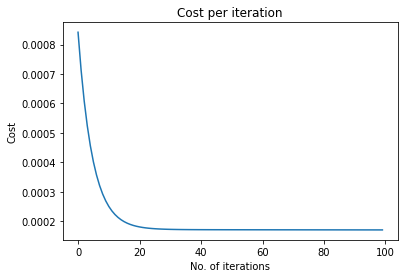

In [582]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

In [589]:
# test data
tdata = dataa[500:,:9]
tdata.shape
tx = tdata[:,:8]
ty = tdata[:,8:]
tx.shape

(269, 8)

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

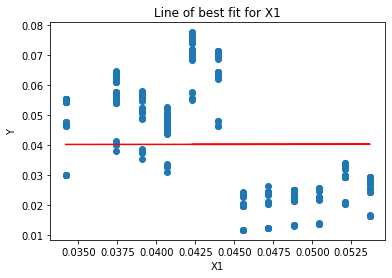

In [591]:
#Plot dataset
plt.scatter(x[:,1], y)
#Predict y values
pred = thetaMB[1] * x[:,1] + thetaMB[0]
#Plot predictions as line of best fit
plt.plot(x[:,1], pred, c='r')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Line of best fit for X1')
plt.show()

### Gradient descent's progress with num of iterations

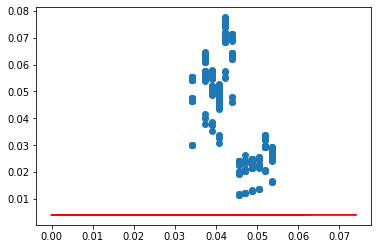

In [593]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111)
b = theta_progress[0,0]
m = theta_progress[0,1]
pred = m*x + b

line = ax.plot(x,pred, '-',c='r')[0]

def animate(i,b_prog,m_prog):
    pred = m_prog[i,1] * x + b_prog[i,0]
    line.set_data(x,pred)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=theta_progress.shape[0], fargs=(theta_progress,theta_progress,))
ax.scatter(x[:,1],y)
HTML(ani.to_jshtml())